---
layout: default
title: "Linear Regression - Model Representation"
categories: linearRegression
permalink: /ML2/
order: 2
comments: true
---

In [2]:
%pylab --no-import-all inline
import pandas as pd
import seaborn as sns
from sklearn import datasets, metrics

Populating the interactive namespace from numpy and matplotlib


# Model Representation
Let's use as an example the housing prices in Portland Oregon and plot them with respect to the surface of the house in square feets

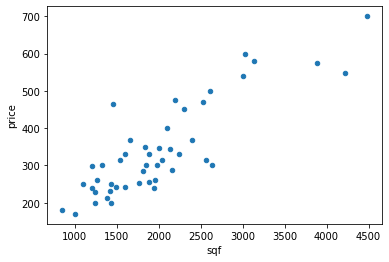

In [25]:
training_set = pd.read_csv('data/house_pricing.csv').drop('rooms', axis=1)
training_set.price /= 1000
training_set.plot.scatter(x='sqf', y='price');

Let's say that you want to know the possible price of an house given its surface. One thing that you could do is to draw a straight line that describes the growth of prices with surface.

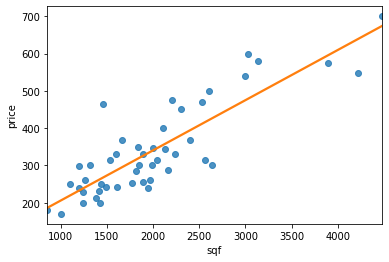

In [28]:
sns.regplot(data=training_set, x='sqf', y='price', ci=None, line_kws={'color':'C1'});

This is an example of supervised learning since we know the answer for each example in the dataset and it is also an example of regression problem, where we try to predict a contnuous value.

In supervised learning we have a training set that contains examples $(x, y)$ and our job is learning how to predict labels $y$ for new examples $x$

In [31]:
training_set.head().style.set_properties(**{'text-align': 'left'}).hide_index()

sqf,price
2104,399.900000
1600,329.900000
2400,369.000000
1416,232.000000
3000,539.900000


* $m$ denotes the number of training examples 
* $x$ denotes the input variables / features
* $y$ denotes the output variable / target
* $x, y$ is a training example
* $^{(i)}$ is the index in the training set (# row) 
* $x^{(i)}, y^{(i)}$ is the specific training example at row $i$

So $x^{(2)}$ is the second (if we count from 1 as it is common in math) or the third (if we count from 0 as it is common in computer science) row of $x$

  
A pair $\left(x^{(i)} , y^{(i)}\right)$ is called a training example, and the dataset that we’ll be using to learn (a list of $m$ training examples) is called a training set. Note that the superscript $^{(i)}$ in the notation is simply an index into the training set, and has nothing to do with exponentiation. We will also use $X$ to denote the space of input values, and $Y$ to denote the space of output values. In this example, $X = Y = \mathbb{R}$. 

To describe the supervised learning problem slightly more formally, our goal is, given a training set, to learn a function $h : X \to Y$ so that $h(x)$ is a “good” predictor for the corresponding value of $y$. For historical reasons, this function $h$ is called a hypothesis. Seen pictorially, the process is therefore like this:

![ML](./data/img/ML-flowchart.png)

When the target variable that we’re trying to predict is continuous, such as in our housing example, we call the learning problem a regression problem. When $y$ can take on only a small number of discrete values (such as if, given the living area, we wanted to predict if a dwelling is a house or an apartment, say), we call it a classification problem.

## How to repesent a linear regression hypothesis
The output of a machine learning algorythm is a function $h$. But how do we represent $h$?. Our initial choice is to represent $h$ as a linear function:

$$y = h_\theta(x) = \theta_0 + \theta_1x$$

Sometimes, we might want to use more complex non-linear functions, but this is the simplest building block of regression algorithms which can be built upon later.

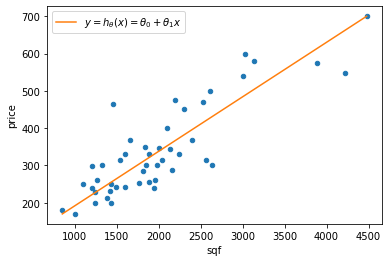

In [33]:
ax = training_set.plot.scatter(x='sqf', y='price', c='C0')
ax.plot(*np.array([training_set.min(),  training_set.max()]).T, 
        label='$y = h_\\theta(x) = \\theta_0 + \\theta_1x$', c='C1') 
ax.legend();

where $\theta_0$ is the offset of $y$ from 0; $\theta_1$ is the slope of the line, since it scales how much $y$ varies compared to $x$.